<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Classification of Weather Data using Decision Trees
<br><br>
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Daily Weather Data Analysis</p>

In this notebook, we will use scikit-learn to perform a decision tree based classification of weather data.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Importing the Necessary Libraries<br></p>

In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Creating a Pandas DataFrame from a CSV file<br></p>


In [6]:
data = pd.read_csv('daily_weather.csv')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Daily Weather Data Description</p>


The file **daily_weather.csv** is a comma-separated file that contains weather data.  This data comes from a weather station located in San Diego, California.  The weather station is equipped with sensors that capture weather-related measurements such as air temperature, air pressure, and relative humidity.  Data was collected for a period of three years, from September 2011 to September 2014, to ensure that sufficient data for different seasons and weather conditions is captured.<br><br>
Let's now check all the columns in the data.

In [8]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [9]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


<br>Each row in daily_weather.csv captures weather data for a separate day.  <br><br>
Sensor measurements from the weather station were captured at one-minute intervals.  These measurements were then processed to generate values to describe daily weather. Since this dataset was created to classify low-humidity days vs. non-low-humidity days (that is, days with normal or high humidity), the variables included are weather measurements in the morning, with one measurement, namely relatively humidity, in the afternoon.  The idea is to use the morning weather values to predict whether the day will be low-humidity or not based on the afternoon measurement of relative humidity.

Each row, or sample, consists of the following variables:

* **number:** unique number for each row
* **air_pressure_9am:** air pressure averaged over a period from 8:55am to 9:04am (*Unit: hectopascals*)
* **air_temp_9am:** air temperature averaged over a period from 8:55am to 9:04am (*Unit: degrees Fahrenheit*)
* **air_wind_direction_9am:** wind direction averaged over a period from 8:55am to 9:04am (*Unit: degrees, with 0 means coming from the North, and increasing clockwise*)
* **air_wind_speed_9am:** wind speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* ** max_wind_direction_9am:** wind gust direction averaged over a period from 8:55am to 9:10am (*Unit: degrees, with 0 being North and increasing clockwise*)
* **max_wind_speed_9am:** wind gust speed averaged over a period from 8:55am to 9:04am (*Unit: miles per hour*)
* **rain_accumulation_9am:** amount of rain accumulated in the 24 hours prior to 9am (*Unit: millimeters*)
* **rain_duration_9am:** amount of time rain was recorded in the 24 hours prior to 9am (*Unit: seconds*)
* **relative_humidity_9am:** relative humidity averaged over a period from 8:55am to 9:04am (*Unit: percent*)
* **relative_humidity_3pm:** relative humidity averaged over a period from 2:55pm to 3:04pm (*Unit: percent *)


In [11]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


### Checking Null Values

In [13]:
data.isnull().any()

number                    False
air_pressure_9am           True
air_temp_9am               True
avg_wind_direction_9am     True
avg_wind_speed_9am         True
max_wind_direction_9am     True
max_wind_speed_9am         True
rain_accumulation_9am      True
rain_duration_9am          True
relative_humidity_9am     False
relative_humidity_3pm     False
dtype: bool

In [14]:
data.isnull().any(axis = 1)

0       False
1       False
2       False
3       False
4       False
        ...  
1090    False
1091    False
1092    False
1093    False
1094    False
Length: 1095, dtype: bool

In [15]:
#any rows with null values?
filterRowWithNull = data.isnull().any(axis = 1)
data[filterRowWithNull].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


In [16]:
data[data.isnull().any(axis=1)].shape

(31, 11)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Data Cleaning Steps<br></p>

We will not need to number for each row so we can clean it.

In [18]:
del data['number']
print(data.shape)

(1095, 10)


Now let's drop null values using the pandas **dropna** function.

In [20]:
before_rows = data.shape[0]
print(before_rows)

1095


In [21]:
#dropping rows with at least one NaN
data = data.dropna()

In [22]:
after_rows = data.shape[0]
print(after_rows)

1064


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
How many rows dropped due to cleaning?<br><br></p>


In [24]:
before_rows - after_rows

31

In [25]:
data.shape

(1064, 10)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Convert to a Classification Task <br></p>
Let's predict/classify the relative humidity values at 3pm by using some of the 9am sensor signals. <br>

Since a classification task predicts a categorical output, and relative_humidity_3pm currently is a numerical type, let's binarize the relative_humidity_3pm to 0 or 1 -- if the humidity > 24.99, then we set it to 1; otherwise 0. <br>

**Inputs (features)**: some 9am sensor signals. <br>
**Output**: humidity level @3pm (1 or 0)


In [27]:
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [28]:
#unit for relative_humidity_3pm is a percent.
data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [29]:
print (False * 1)

0


In [30]:
print (True * 1)

1


In [31]:
clean_data = data.copy()
# The "*1" below converts a boolean type to a int type
print(clean_data['relative_humidity_3pm'] > 24.99)
print("--------")
print((clean_data['relative_humidity_3pm'] > 24.99)*1)
print("--------")
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99)*1
clean_data.head()

0        True
1       False
2       False
3       False
4        True
        ...  
1090     True
1091     True
1092     True
1093     True
1094    False
Name: relative_humidity_3pm, Length: 1064, dtype: bool
--------
0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: relative_humidity_3pm, Length: 1064, dtype: int64
--------


,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Output: Target is stored in 'y'.
<br><br></p>


In [33]:
y=clean_data[['high_humidity_label']].copy()
#print(y)
print(type(y))
#TODO: replace the "[[" with "[" and check the type of y again. What is it?  
#print(type(clean_data['high_humidity_label']))
y.head()

<class 'pandas.core.frame.DataFrame'>


,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [34]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [35]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Inputs: Features are stored in X <br></p>
Choose a subset of 9am sensor data.


In [37]:
clean_data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1


In [38]:
data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

### Choose a subset of 9am sensor data.

In [40]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_speed_9am',
       'max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am', 'relative_humidity_9am']

In [41]:
X = clean_data[morning_features].copy()

In [42]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_speed_9am',
       'max_wind_speed_9am', 'rain_accumulation_9am', 'rain_duration_9am',
       'relative_humidity_9am'],
      dtype='object')

In [43]:

y.columns

Index(['high_humidity_label'], dtype='object')

In [44]:
X.shape

(1064, 7)

In [45]:
y.shape

(1064, 1)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"> <br>
Perform Test and Train split
<br></p>



## REMINDER: Training Phase

In the **training phase**, the learning algorithm uses the training data to adjust the model’s parameters to minimize errors.  At the end of the training phase, you get the trained model.

<img src="Images/TrainingVSTesting.png" align="middle" style="width:450px;height:260px;"/>
<br>

In the **testing phase**, the trained model is applied to test data.  Test data is separate from the training data, and is previously unseen by the model.  The model is then evaluated on how it performs on the test data.  The goal in building a classifier model is to have the model perform well on training as well as test data.


### Split Dataset into training set and testing set <br>
For example 67% for testing and 33% for training. <br>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html" width = 200> document for sklearn.model_selection.train_test_split() </a>

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [50]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 7)
(712, 1)
(352, 7)
(352, 1)


In [51]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [52]:
X_train.head()

,air_pressure_9am,air_temp_9am,avg_wind_speed_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am
841,918.370000,72.932000,2.013246,2.773806,0.0,0.0,8.810000
75,920.100000,53.492000,13.444009,15.367778,0.0,0.0,31.470000
95,927.610000,54.896000,4.988376,7.202947,0.0,0.0,13.510000
895,919.235153,65.951112,2.942019,3.658810,0.0,0.0,14.073504
699,919.888128,68.687822,3.960858,5.185547,0.0,0.0,14.492839


In [53]:
y_train.describe()

,high_humidity_label
count,712.000000
mean,0.494382
std,0.500320
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


<p style="font-family: Arial; font-size:2.25em;color:blue; font-style:bold"><br>
Without HyperParameter Tuning
</p>

#### Directly specify a set of hyperparameters for model training


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Fit on the Train Set (Model building, e.g., creating the decision tree)</p>

 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier


In [56]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

#humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=5, max_depth = 5, random_state=0)

#Build the model, creating a decision tree, which is defined by the humidity_classifier.
humidity_classifier.fit(X_train, y_train)

humidity_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [57]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Predict on Test Set 
</p>


In [59]:
X_test.shape

(352, 7)

In [60]:
predictions = humidity_classifier.predict(X_test)

In [61]:
type(predictions)

numpy.ndarray

In [62]:
predictions[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [63]:
#y_test holds output values for the X_test set
y_test['high_humidity_label'][:10]

456     0
845     0
693     1
259     1
723     1
224     1
300     1
442     0
585     1
1057    1
Name: high_humidity_label, dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Measure Accuracy of the Classifier
<br></p>

Compare predicted y values with actual y values from the test set and calculate accuracy.

In [65]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9119318181818182

<p style="font-family: Arial; font-size:2.25em;color:#FF5733; font-style:bold"><br>
Data Splitting Methods
</p>

1. #### **Hold-out split (a.k.a. Hold-out validation)**

<img src="Images/holdOutValidation.png" align="middle" style="width:550px;height:50px;"/>

2. #### **K-fold cross validation.**
    - The dataset is split into k equal parts.
    - Each part serves as the test set once, while the others form the training set.

<img src="Images/K-fold_CrossValidation.png" align="middle" style="width:450px;height:160px;"/>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Hold-out Validation (Train/Test Split )
<br><br></p>



In [68]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [69]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
#Build the model, creating a decision tree, which is defined by the humidity_classifier.
humidity_classifier.fit(X_train, y_train)
humidity_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [70]:
#Predict on testing set
predictions = humidity_classifier.predict(X_test)

In [71]:
#Compare predicted y values with actual y values from the test set and calculate accuracy.
accuracy_score(y_true = y_test, y_pred = predictions)

0.8977272727272727

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
K-Fold Cross Validation
</p>

In [73]:
from sklearn.model_selection import cross_val_score
import numpy as np

humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=5, max_depth = 5, random_state=0)

#train model with cv of 10 
cv_scores = cross_val_score(humidity_classifier, X, y, cv=10)

#print each cv score (accuracy) and average them
print(cv_scores)
print('mean accuracy scores of 10-fold cross validation:', np.mean(cv_scores))

[0.81308411 0.89719626 0.91588785 0.86915888 0.8490566  0.85849057
 0.86792453 0.89622642 0.93396226 0.9245283 ]
mean accuracy scores of 10-fold cross validation: 0.882551578204902


Using cross-validation, our mean score is different from the Train/Test split method. This is a more accurate representation of how our model will perform on unseen data than our earlier testing using the holdout method.

### <font style = "color:red"> Note </font>
 In the above K-fold cross validation example, we used `X` and `y` in the `cross_val_score()` to simplify explanation. In practice, K-fold cross-validation is used upon the training set, instead of the whole dataset. See the following sections.

<p style="font-family: Arial; font-size:2.25em;color:blue; font-style:bold"><br>
HyperParameter Tuning
</p>




### Hyperparameter Tuning -- K-Fold Cross Validation + <font style = "color:red"> Grid search </font>



In [149]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Set seed to 1 for reproducibility
SEED = 128
#Instantiate a Decision Tree classifier.
humidity_classifier_dt = DecisionTreeClassifier(random_state=SEED)
print(humidity_classifier_dt.get_params())

#train model WITH cv of 10 without hyperparameter tuning (using default values)
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'criterion': ['gini', 'entropy'],
'max_depth': [3,4,5, 6],
'max_leaf_nodes':[5,10,15,20],
'max_features': [0.2, 0.4,0.6, 0.8] #The number of features to consider when looking for the best split:
}

# Instantiate a 10-fold CV grid search object 'humidity_classifier_gscv '
humidity_classifier_dt_gscv = GridSearchCV(estimator=humidity_classifier_dt,
                      param_grid=params_dt,
                      scoring='accuracy',
                      cv=10)
# Fit 'humidity_classifier_gscv' to the training data
humidity_classifier_dt_gscv.fit(X_train, y_train)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 128, 'splitter': 'best'}


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=128),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'max_leaf_nodes': [5, 10, 15, 20]},
             scoring='accuracy')

In [151]:
# Extract best hyperparameters from 'humidity_classifier_dt_gscv'
best_hyperparams_gscv = humidity_classifier_dt_gscv.best_params_
print('Best hyerparameters:\n', best_hyperparams_gscv, '\n')

# Extract accuracy score of the best model from 'humidity_classifier_dt_gscv'
best_training_score_gscv = humidity_classifier_dt_gscv.best_score_
print('Best training accuracy: ', best_training_score_gscv)

Best hyerparameters:
 {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'max_leaf_nodes': 10} 

Best training accuracy:  0.875136932707355


In [80]:
 # Extract best model from 'humidity_classifier_dt_gscv'
best_model_gscv = humidity_classifier_dt_gscv.best_estimator_

# Evaluate test set accuracy
test_score_gscv = best_model_gscv.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_score_gscv))
 

Test set accuracy of best model: 0.898



### Hyperparameter Tuning -- K-Fold Cross Validation + <font style = "color:red"> Random search </font>

In [82]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Set seed to 1 for reproducibility
SEED = 0
#Instantiate a Decision Tree classifier.
humidity_classifier_dt = DecisionTreeClassifier(random_state=SEED)
print(humidity_classifier_dt.get_params())

#train model WITH cv of 10 without hyperparameter tuning (using default values)
from sklearn.model_selection import RandomizedSearchCV
# Define the grid of hyperparameters 'params_dt'
params_dt = {
'criterion': ['gini', 'entropy'],
'max_depth': [3,4,5, 6],
'max_leaf_nodes':[5,10,15,20],
'max_features': [0.2, 0.4,0.6, 0.8]
}

# Instantiate a 10-fold CV random search object 'humidity_classifier_rscv '
humidity_classifier_dt_rscv = RandomizedSearchCV(estimator=humidity_classifier_dt,
                      param_distributions=params_dt,
                      scoring='accuracy',
                       cv=10)
# Fit 'humidity_classifier_rscv' to the training data
humidity_classifier_dt_rscv.fit(X_train, y_train)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [0.2, 0.4, 0.6, 0.8],
                                        'max_leaf_nodes': [5, 10, 15, 20]},
                   scoring='accuracy')

In [83]:
# Extract best hyperparameters from 'humidity_classifier_dt_gscv'
best_hyperparams_rscv = humidity_classifier_dt_rscv.best_params_
print('Best hyerparameters:\n', best_hyperparams_rscv, '\n')

# Extract CV score of the best model from 'humidity_classifier_dt_fscv'
best_training_score_rscv = humidity_classifier_dt_rscv.best_score_
print('Best training accuracy: ', best_training_score_rscv)

Best hyerparameters:
 {'max_leaf_nodes': 20, 'max_features': 0.8, 'max_depth': 4, 'criterion': 'gini'} 

Best training accuracy:  0.8624413145539904


In [84]:
 # Extract best model from 'humidity_classifier_dt_gscv'
best_model_rscv = humidity_classifier_dt_rscv.best_estimator_
# Evaluate test set accuracy
test_score_rscv = best_model_rscv.score(X_test,y_test)
# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_score_rscv))
 

Test set accuracy of best model: 0.892


### Generate classification Performance Report

In [86]:
from sklearn.metrics import classification_report
report = classification_report(y_true=y_test, y_pred = best_model_rscv.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       175
           1       0.90      0.88      0.89       177

    accuracy                           0.89       352
   macro avg       0.89      0.89      0.89       352
weighted avg       0.89      0.89      0.89       352



In [87]:
# Get feature importances
feature_importances = best_model_rscv.feature_importances_

# Convert to a pandas DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,           # Assuming X is your feature DataFrame
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                 Feature  Importance
6  relative_humidity_9am    0.812240
0       air_pressure_9am    0.098050
1           air_temp_9am    0.050576
3     max_wind_speed_9am    0.032621
5      rain_duration_9am    0.006513
2     avg_wind_speed_9am    0.000000
4  rain_accumulation_9am    0.000000


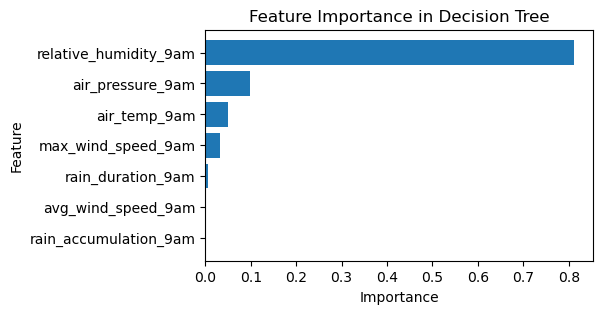

In [88]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(5, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Optional: makes the most important feature appear at the top
plt.show()


### Now compare the testing results of models with and without hyperparameter tuning. What's your observation?

<p style="font-family: Arial; font-size:1.75em;color:red; font-style:bold"><br>
Practice
</p>
Change/add values of the hyperparameter dictionary **params_dt** of above DecisionTreeClassifier model, and use either Grid Search or Random Search for hyperparameter tuning. Can you generate even better testing results?
<p>
